In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 불러오고 형태를 확인한다
academic = pd.read_csv('DataScience_Term/academic.csv', encoding='cp949', header=None)
academic.head()

,0,1,2,3
0,[4학년] 2020 공과대학 캡스톤디자인·졸업작품 경진대회 참가 신청 안내 (기한 ...,20.06.04,106,NaN
1,[★★★ 기말시험 시간표 안내(강의실변경) ★★★],20.06.02,409,NaN
2,[★★★1학기 기말 시험 실시 안내(6.08(월) ~ 6.19(금)) ★★★],20.06.02,154,NaN
3,[★★★ 2020년도 1학기 LINC+ 캡스톤결과보고서 제출 안내 ★★★],20.05.28,266,NaN
4,[★★★ 코로나 19관련 2020학년도 1학기 학사일정 변경안내 ★★★],20.04.20,760,NaN


In [3]:
print('데이터 모양 : ', academic.shape)

데이터 모양 :  (1143, 4)


In [4]:
# 2. 데이터 전처리

## 3번째 행 없애기
academic_data = np.array(academic)
academic_data = academic_data[:,0:3]
# academic_data = academic_data[0:3,0:3]
print(academic_data)
print(academic_data[0,2])

academic_data.shape

[['[4학년] 2020 공과대학 캡스톤디자인·졸업작품 경진대회 참가 신청 안내 (기한 6.15.(월) 18시까지)'
  '20.06.04' 106]
 ['[★★★ 기말시험 시간표 안내(강의실변경) ★★★]' '20.06.02' 409]
 ['[★★★1학기 기말 시험 실시 안내(6.08(월) ~ 6.19(금)) ★★★]' '20.06.02' 154]
 ...
 ['[인증-필독] 수강신청시 교과목이수체계도 확인 및 수강능력평가서 제출 안내' '12.01.31' 586]
 ['[전체] 수강신청 기간 및 방법 안내' '12.01.31' 685]
 ['[인증] 수강신청 기간 안내(2월1일~2월2일)' '12.01.30' 580]]
106


(1143, 3)

In [5]:
# 3. 데이터 분석

from konlpy.tag import Okt
okt = Okt()

rowKeywords = []
for i in range(0,academic_data.shape[0]) :
    if academic_data[i,0] != None :
        oneRow = okt.nouns(academic_data[i,0])
#         oneRow = [n for n in oneRow if len(n)>1]  #한 글자 명사를 제거해줌
#         oneRow = [n for n in oneRow if n!='안내' and n!='확인'and n!='제출'and n!='학년']  #특정 필요없는 키워드 지움
        oneRow = list(set(oneRow)) # 키워드에서 중복을 제거해줌
        rowKeywords.append(oneRow)
        
print(rowKeywords)

## rowKeywords에 각 제목당 키워드들을 저장해둠

[['참가', '신청', '안내', '졸업', '대회', '경진', '작품', '기한', '공과대학', '캡', '스톤', '월', '디자인', '학년'], ['말', '안내', '시간표', '변경', '시험', '강의실'], ['학기', '말', '실시', '안내', '월', '금', '시험'], ['학기', '보고서', '안내', '캡', '스톤', '결과', '제출'], ['학기', '안내', '관련', '일정', '코로나', '변경', '학사', '학년'], ['학기', '계절', '안내', '운영', '계획', '변경'], ['신청', '안내', '인정', '학점', '영어'], ['학기', '안내', '운영', '재택', '계획', '수업', '필독', '학년'], ['석', '특례', '장학금', '및', '안내', '석사', '대학원', '박사', '과정', '계', '통합', '학'], ['해외', '신청', '인턴십', '인정', '학점', '양식'], ['학기', '및', '교육', '봉사', '목', '교직', '기한', '봉사활동', '확인', '제출', '학년'], ['백마', '안내', '제출', '이수지', '인턴십', '기한', '선발', '원서', '학생', '확정', '계', '수'], ['학기', '검사', '접수', '및', '실시', '안내', '적성', '교직', '위', '금', '인성', '신청서'], ['요청', '특강', '안내', '컴퓨터', '참여', '최신', '수', '재학생'], ['학기', '안내', '목', '교과', '이수', '지도', '등록'], ['전공', '백마', '구분', '과목', '완료', '인턴십', '자가진단', '졸업', '정정', '확인', '이수'], ['학기', '수강', '신청', '계절', '안내', '목', '화'], ['논문', '신청', '서류', '및', '안내', '졸업', '심사', '금', '월', '결과', '제출', '예정', '후기', '학년'], ['

In [6]:
import collections

numOfAllNouns = collections.Counter('')

for i in range(0, academic_data.shape[0]) :
    numOfOneRow = collections.Counter(rowKeywords[i])
    numOfNouns = collections.Counter(rowKeywords[i])
    for j in range(1, academic_data[i,2]) :
        numOfNouns = numOfNouns+numOfOneRow     #weight반영하는 부분
    numOfAllNouns = numOfAllNouns + numOfNouns
    
print(numOfAllNouns)

## 각 글자에 대한 빈도수 분석. (weight 반영)
## 결과는 딕셔너리 형태로 나오게 된다.

Counter({'안내': 323190, '학년': 172772, '학기': 169661, '신청': 103464, '졸업': 84652, '수강신청': 67237, '및': 57338, '확인': 50001, '제출': 48052, '금': 43179, '제': 37987, '월': 36389, '전체': 35245, '수강': 33482, '프로젝트': 31710, '계절': 29959, '계획': 29693, '수': 29580, '학생': 29189, '기간': 25395, '화': 24731, '전기': 24053, '변경': 23974, '기한': 23717, '논문': 23637, '인증': 22812, '영어': 22803, '교과목': 22491, '결과': 22099, '설계': 21735, '인정': 21373, '인턴십': 21321, '전공': 21258, '차': 21174, '조정': 20800, '추가': 20612, '목': 20337, '예정자': 20316, '이수': 20136, '장학금': 19050, '사업': 18846, '운영': 18665, '신청서': 18529, '석': 17771, '장학': 17387, '위': 17295, '선발': 17163, '학점': 16991, '백마': 16977, '사정': 16697, '과목': 16347, '필독': 16239, '사항': 15641, '명단': 15154, '수정': 14716, '캡': 14714, '스톤': 14714, '관련': 14580, '학과': 14339, '일정': 13986, '컴퓨터공학': 13902, '교수': 13281, '교내': 13241, '학부': 13186, '성적': 12974, '동기': 12350, '수업': 12275, '공학': 12102, '디자인': 12096, '대상': 11917, '분반': 11726, '상담': 11616, '모집': 11590, '단': 11470, '실시': 11335, '우수': 11149

In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_result = te.fit(rowKeywords).transform(rowKeywords)
df = pd.DataFrame(te_result, columns=te.columns_)

print(df)

## 키워드에 대한 연관 분석도 수행해 보았다.

         가구     가능    가능성     가산     가압     가운     가입     가족     각반      강  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1138  False  False  False  False  False  False  False  False  False  False   
1139  False  False  False  False  False  False  False  False  False  False   
1140  False  False  False  False  False  False  False  False  False  False   
1141  False  False  False  False  False  False  False  False  False  False   
1142  False  False  False  False  False  False  False  False  False  False   

      ...     후배     훈련     휴가     휴강     휴무     휴업     휴학    휴

In [9]:
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.027122,(강의)
1,0.055993,(결과)
2,0.023622,(계)
3,0.079615,(계절)
4,0.056868,(계획)
...,...,...
446,0.021872,"(신청, 학기, 제, 학년)"
447,0.034996,"(학기, 전체, 안내, 학년)"
448,0.061242,"(학기, 제, 안내, 학년)"
449,0.020122,"(학기, 안내, 수강신청, 전체, 학년)"


In [10]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.97)

## 연관 분석 결과를 구해보긴 했으나, 크게 의미는 없는 것 같아서 이용하지는 않았다.
## 캡/ 스톤 과 같은 결과를 모으기 위함이었으나 그냥 weight가 반영된 빈도수를 이용하는 것이 나을 것 같다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(동기),(계절),0.034121,0.079615,0.034121,1.000000,12.560440,0.031404,inf
1,(논문),(졸업),0.037620,0.176728,0.036745,0.976744,5.526825,0.030097,35.400700
2,(단),(사업),0.025372,0.039370,0.025372,1.000000,25.400000,0.024373,inf
3,(디자인),(스톤),0.032371,0.041120,0.032371,1.000000,24.319149,0.031040,inf
4,(디자인),(캡),0.032371,0.041120,0.032371,1.000000,24.319149,0.031040,inf
5,(백마),(인턴십),0.037620,0.044619,0.037620,1.000000,22.411765,0.035942,inf
6,(사정),(졸업),0.042870,0.176728,0.041995,0.979592,5.542938,0.034418,40.340332
7,(캡),(스톤),0.041120,0.041120,0.041120,1.000000,24.319149,0.039429,inf
8,(스톤),(캡),0.041120,0.041120,0.041120,1.000000,24.319149,0.039429,inf
9,(연기),(졸업),0.023622,0.176728,0.023622,1.000000,5.658416,0.019447,inf


In [23]:
top50 = numOfAllNouns.most_common(50)
print(top50)
## top 50 keyword는 다음과 같다.
## 그러나 안내, 학년 과 같은 키워드는 별 의미가 없기에, 이 중에 의미가 있는 데이터를 뽑고

[('안내', 323190), ('학년', 172772), ('학기', 169661), ('신청', 103464), ('졸업', 84652), ('수강신청', 67237), ('및', 57338), ('확인', 50001), ('제출', 48052), ('금', 43179), ('제', 37987), ('월', 36389), ('전체', 35245), ('수강', 33482), ('프로젝트', 31710), ('계절', 29959), ('계획', 29693), ('수', 29580), ('학생', 29189), ('기간', 25395), ('화', 24731), ('전기', 24053), ('변경', 23974), ('기한', 23717), ('논문', 23637), ('인증', 22812), ('영어', 22803), ('교과목', 22491), ('결과', 22099), ('설계', 21735), ('인정', 21373), ('인턴십', 21321), ('전공', 21258), ('차', 21174), ('조정', 20800), ('추가', 20612), ('목', 20337), ('예정자', 20316), ('이수', 20136), ('장학금', 19050), ('사업', 18846), ('운영', 18665), ('신청서', 18529), ('석', 17771), ('장학', 17387), ('위', 17295), ('선발', 17163), ('학점', 16991), ('백마', 16977), ('사정', 16697)]


In [49]:
# 4. 데이터 모델링 evaluation
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
frequencyOfMonth = [0,0,0,0,0,0,0,0,0,0,0,0]

keyword = top50[4][0]
print('키워드 : ',keyword)

for i in range(0, len(rowKeywords)) :
    for j in range(0, len(rowKeywords[i])) :
        if rowKeywords[i][j]==keyword :
            print(academic_data[i,0])
            num = num+1
            date = academic_data[i,1]
            monthVal = date[3:5]
            frequencyOfMonth[month.index(monthVal)] += 1
                
            
## 특정 키워드에 대한 제목들을 쭉 찾을 수 있다.

키워드 :  졸업
[4학년] 2020 공과대학 캡스톤디자인·졸업작품 경진대회 참가 신청 안내 (기한 6.15.(월) 18시까지)
[★★★ 백마인턴십 과목의 전공 이수구분 정정완료(5.15일자) 졸업 자가진단 확인 바랍니다~ ★★★]
[졸업논문] 2019학년도 후기 졸업논문 제출 안내 (제출예정 신청-2020.5.15.(금)까지  졸업논문및심사결과서류-6.15.(월)까지)
[★★★ 2019학년도 후기 졸업대상자 예비사정 결과 확인 바랍니다.(4.28(화)까지) ★★★]
[졸업프로젝트] SW사업_산학협력멘토링 프로그램 지원 신청 안내(신청서 4.20.(월)까지)
[졸업프로젝트] 2020.3.9.현재 컴퓨터공학과 졸업프로젝트 수행 명단 확인(기한: 2020.3.15.(일)까지)
[졸업프로젝트] 2020.3.9.현재 컴퓨터공학과 졸업프로젝트 수행 명단 확인(기한: 2020.3.15.(일)까지)
[졸업프로젝트][추가신청] 2020전기 졸업프로젝트 추가 신청위한 교수님 및 주제 안내 (1)
[졸업프로젝트][1차 매칭 완료] 2020전기 졸업프로젝트 교수별. 주제별 신청 현황 (4)
[★★★2020.2월 졸업대상자 졸업본사정 결과 안내 : 온라인 자가 확인 바랍니다.★★★]
[4학년] (1.31. 수정) 2020 전기 졸업논문을 위한 졸업프로젝트신청서 제출 안내 (제출기한 2020.1.31.(금)정오까지) (3)
[★★★ 2019학년도 전기 졸업연기 신청 안내 ★★★]
[졸업식] 2020년 2월 졸업식 관련 사전 안내 -컴퓨터공학과 학사학위 졸업자를 위한 안내-
[3학년 및 4학년 진입예정자] 컴퓨터공학과 졸업논문을 위한 졸업 프로젝트 신청 "사전 안내" (2)
[졸업논문] 2019학년도 전기 졸업논문 합불 명단 확인 (2020년2월 졸업 대상자)
[졸업논문] 2019학년도 전기 졸업논문 제출 안내 (제출예정 신청-11.8.(금) 까지  졸업논문및심사결과서류-12.16.(월)까지)
[★★ ★졸업 예정자 2학기 영어 능력 2차 신청기간 연장 : 1.31(금) 13시까지 ★★

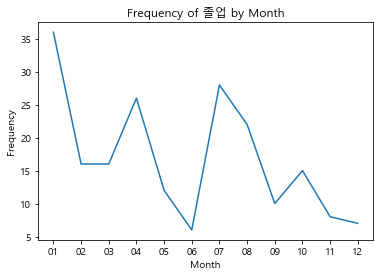

In [50]:
plt.plot(month, frequencyOfMonth)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of ' +keyword+' by Month')
plt.show()

##월별로 해당 